# **Comparative Analysis of Classification Algorithms for Breast Cancer Diagnosis**

## **Abstract**

This project investigates the effectiveness of various machine learning algorithms for breast cancer diagnosis using the Breast Cancer Wisconsin dataset. The primary objective is to evaluate and compare the performance of Decision Tree, Naive Bayes, and k-Nearest Neighbors (kNN) classifiers in predicting whether a tumor is benign or malignant. Additionally, the study examines the impact of dimensionality reduction through Principal Component Analysis (PCA), assessing whether a reduced feature set can preserve model accuracy while potentially improving computational efficiency. Models are assessed using standard classification metrics, including accuracy, precision, recall, and F1-score. Experimental results indicate that while the kNN classifier achieves the highest overall accuracy and F1-score, Naive Bayes and Decision Tree models also deliver competitive results. The findings highlight how different algorithms respond to dimensionality reduction, offering insights into the trade-offs between accuracy, computational performance, and model interpretability—especially relevant in medical diagnostic applications.

## **Introduction**

Machine learning plays a crucial role in medical diagnostics by enabling accurate and automated disease classification. One common application is in identifying whether a tumor is benign or malignant, which can significantly impact treatment decisions. This project applies machine learning algorithms to the *Breast Cancer Wisconsin (Diagnostic) Dataset*, which includes 30 numerical features extracted from digitized images of breast cell nuclei.

The aim is to compare the performance of three classification algorithms: Decision Tree, Naive Bayes, and k-Nearest Neighbors (kNN) on this binary classification task. Additionally, we assess the impact of Principal Component Analysis (PCA) for dimensionality reduction to determine whether fewer features can maintain or improve classification performance.

While previous studies have used this dataset with various algorithms, direct comparisons under identical conditions are limited. The dataset is well-structured but includes challenges such as feature correlation and class imbalance. This project offers a unified evaluation of multiple classifiers, both with and without PCA, to highlight the trade-offs between accuracy, interpretability, and efficiency in a medical context.

## **Background**

This project utilizes three fundamental classification algorithms: Decision Tree, Naive Bayes, and k-Nearest Neighbors (kNN). Each algorithm approaches the classification problem differently, offering unique strengths and limitations.

**k-Nearest Neighbors (kNN)** is a non-parametric, instance-based learning algorithm. It classifies a new data point by finding the k closest points in the training set based on a distance metric, typically Euclidean distance, and assigning the class most common among those neighbors. kNN requires no explicit training phase but can be computationally intensive for large datasets. Its performance depends heavily on the choice of k and the distance metric.

**Naive Bayes** is a probabilistic classifier based on Bayes' theorem, which calculates the posterior probability of a class given the features. It assumes that features are conditionally independent, simplifying computation. Despite this strong independence assumption, Naive Bayes performs well in many practical scenarios. It models the likelihood of features belonging to each class and predicts the class with the highest posterior probability.

**Decision Tree** is a supervised learning method that models decisions as a tree structure. It splits the dataset based on feature values by selecting thresholds that best separate the classes, usually by maximizing information gain or minimizing impurity (e.g., Gini index or entropy). The result is a set of hierarchical decision rules that classify new instances by following a path from the root to a leaf node. Decision trees are intuitive and interpretable but prone to overfitting if not properly pruned.

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used as a preprocessing step. It transforms the original features into a smaller set of uncorrelated variables called principal components, which capture most of the variance in the data. By reducing the number of features, PCA can improve model efficiency and potentially reduce overfitting, but it may also discard information relevant for classification.

Together, these algorithms provide a diverse set of approaches for classification, enabling a comprehensive evaluation of model performance on the breast cancer diagnosis task.

## **Methodology**

The methodology for this project involves several key steps: data exploration, preprocessing, model training, evaluation, and comparison. Each step was designed to ensure reliable and fair assessment of the classification algorithms.

### **1. Imports**

At the outset, all required libraries such as Scikit-learn, NumPy, Pandas are imported as below: 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Data Exploration and Preprocessing**

The Breast Cancer Wisconsin dataset was loaded using scikit-learn. Initial exploration included checking the distribution of classes (benign vs malignant), summary statistics of features, and correlations among features.

The dataset was split into features (X) and target labels (y), and features were scaled using StandardScaler to normalize the input before applying PCA and kNN, as these algorithms are sensitive to feature scaling.

Principal Component Analysis (PCA) was then applied to reduce the dimensionality of the dataset while retaining most of the variance in the data. This transformation helped reduce redundancy among correlated features and improve computational efficiency.

To ensure fair evaluation across imbalanced classes, Stratified K-Fold Cross-Validation was employed. This method divides the dataset into k folds (in this case, 5), while maintaining the same class distribution in each fold. This stratification helps provide a more reliable estimate of model performance, particularly for datasets where one class may dominate.

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features before PCA and classification
scaler = StandardScaler()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # can tune the number of components

# Scale and apply PCA to the data
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

# Define Stratified K-Fold cross-validation for fair class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Class distribution:
target_name
benign       357
malignant    212
Name: count, dtype: int64

Summary statistics of features:
                               mean         std         min         25%  \
mean radius               14.127292    3.524049    6.981000   11.700000   
mean texture              19.289649    4.301036    9.710000   16.170000   
mean perimeter            91.969033   24.298981   43.790000   75.170000   
mean area                654.889104  351.914129  143.500000  420.300000   
mean smoothness            0.096360    0.014064    0.052630    0.086370   
mean compactness           0.104341    0.052813    0.019380    0.064920   
mean concavity             0.088799    0.079720    0.000000    0.029560   
mean concave points        0.048919    0.038803    0.000000    0.020310   
mean symmetry              0.181162    0.027414    0.106000    0.161900   
mean fractal dimension     0.062798    0.007060    0.049960    0.057700   
radius error               0.405172    0.277313   

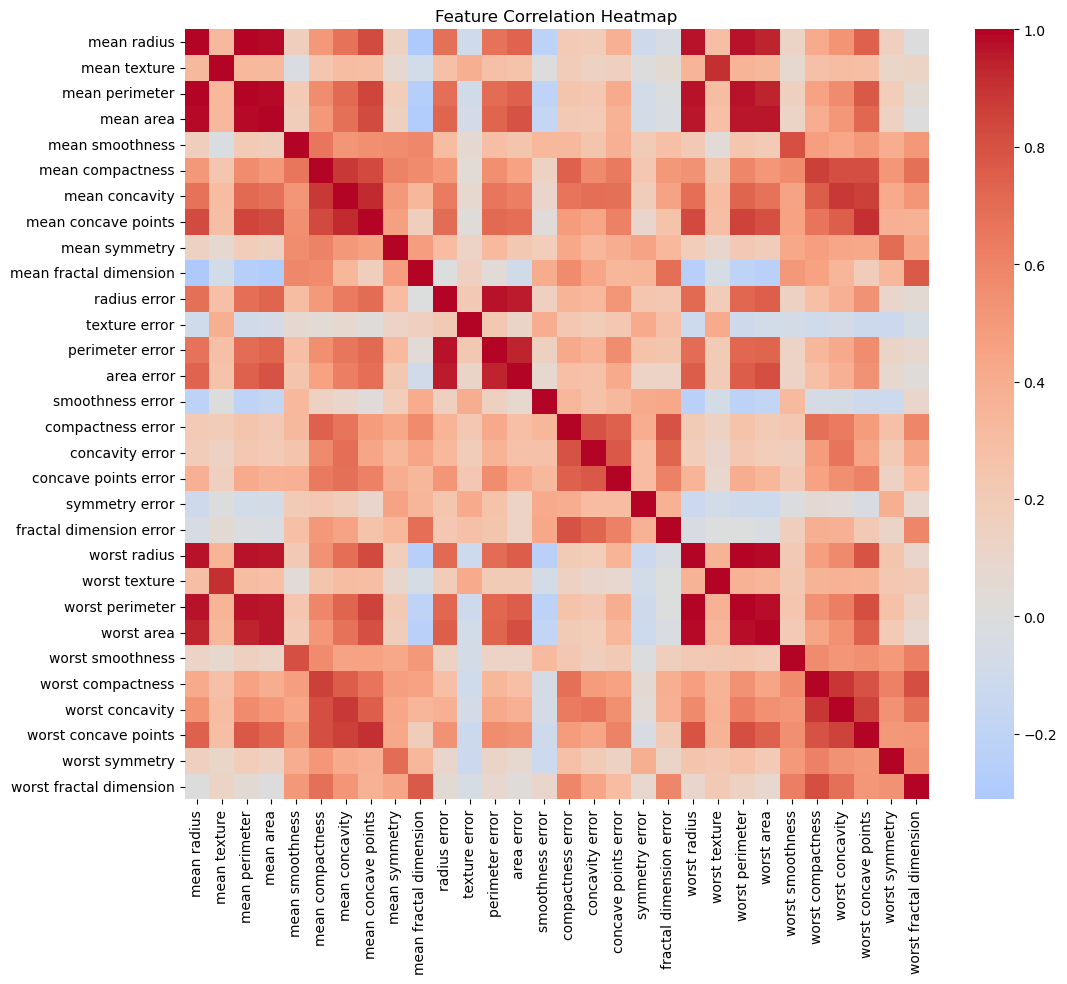

In [3]:
# Data exploration

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Check class distribution
print("Class distribution:")
print(df['target_name'].value_counts())
print()

# Summary statistics of features
print("Summary statistics of features:")
print(df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])
print()

# Correlation matrix of features
corr = df.iloc[:, :-2].corr()  # exclude target and target_name columns

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### **3. Implementation of k-NN from Scratch**

A custom k-Nearest Neighbors (k-NN) classifier was implemented from scratch to compare with scikit-learn’s version. It predicts labels by finding the k closest training samples based on Euclidean distance and uses majority voting to assign the class. This allows direct evaluation of the custom algorithm’s performance against the standard implementation.

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class Custom_KNN_Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, distance_metric='euclidean'):
        """
        Initialize the custom k-Nearest Neighbors classifier.
        
        Parameters:
        - k: Number of nearest neighbors to consider for classification.
        - distance_metric: Distance metric to use (currently only supports 'euclidean').
        """
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        """
        Store the training data and labels.
        
        Parameters:
        - X: Training feature data.
        - y: Training labels.
        
        Returns:
        - self: For compatibility with scikit-learn.
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        """
        Predict the class labels for the input samples.
        
        Parameters:
        - X: Input feature data for which to predict labels.
        
        Returns:
        - predictions: Predicted class labels as a NumPy array.
        """
        X = np.array(X)
        predictions = []

        for x in X:
            # Compute Euclidean distances from x to all training samples
            distances = np.linalg.norm(self.X_train - x, axis=1)

            # Get indices of the k smallest distances
            k_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_indices]

            # Find the most common label (majority vote)
            values, counts = np.unique(k_nearest_labels, return_counts=True)
            majority_vote = values[np.argmax(counts)]

            # Add the predicted label
            predictions.append(majority_vote)

        return np.array(predictions)


### **4. Implementation of Gaussian Naive Bayes from Scratch**

A custom Gaussian Naive Bayes classifier was implemented to compare against scikit-learn’s version. It models each feature’s distribution per class using Gaussian statistics by estimating class-wise means and variances, then predicts by computing log-posterior probabilities for numerical stability. This allows direct evaluation of the custom model’s effectiveness relative to the standard implementation.

In [5]:
class Custom_Naive_Bayes_Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        """
        Initialize the custom Naive Bayes classifier with placeholders for
        class labels, feature means, variances, and prior probabilities.
        """
        self.classes = None
        self.means = {}
        self.vars = {}
        self.priors = {}

    def fit(self, X, y):
        """
        Fit the model by calculating class-wise statistics:
        mean, variance (for Gaussian distribution), and prior probabilities.
        
        Parameters:
        - X: Feature matrix (NumPy array or list of lists).
        - y: Target labels.
        
        Returns:
        - self: Trained classifier instance.
        """
        X, y = np.array(X), np.array(y)
        self.classes = np.unique(y)

        # Initialize dictionaries to store parameters for each class
        self.means = {}
        self.vars = {}
        self.priors = {}

        for c in self.classes:
            # Extract samples of class c
            X_c = X[y == c]
            # Calculate mean and variance for each feature
            self.means[c] = np.mean(X_c, axis=0)
            self.vars[c] = np.var(X_c, axis=0) + 1e-9  # Small constant to avoid divide-by-zero
            # Calculate prior probability for class c
            self.priors[c] = X_c.shape[0] / X.shape[0]

        return self

    def _gaussian_pdf(self, class_idx, x):
        """
        Compute the Gaussian probability density function for a given class and input sample.
        
        Parameters:
        - class_idx: The class label.
        - x: A single sample input feature vector.
        
        Returns:
        - Probabilities for each feature under the Gaussian distribution.
        """
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        """
        Predict class labels for input samples using log-probabilities for numerical stability.
        
        Parameters:
        - X: Feature matrix of test samples.
        
        Returns:
        - predictions: Array of predicted class labels.
        """
        X = np.array(X)
        predictions = []

        for x in X:
            posteriors = []

            for c in self.classes:
                # Calculate the log of the prior probability
                prior = np.log(self.priors[c])
                # Calculate the log of the conditional probability (likelihood)
                probs = np.clip(self._gaussian_pdf(c, x), 1e-9, 1.0)  # avoid log(0)
                conditional = np.sum(np.log(probs))
                # Total posterior (log) = log prior + log likelihood
                posterior = prior + conditional
                posteriors.append(posterior)

            # Choose class with highest posterior probability
            predictions.append(self.classes[np.argmax(posteriors)])

        return np.array(predictions)


### **5. Comparison of Custom Implementations with Standard Implementations**

To validate the correctness of our custom machine learning algorithms, we compared their performance against the well-established implementations from the scikit-learn library. This comparison was conducted using standard evaluation metrics such as Accuracy, Precision, Recall, and F1 Score. Identical performance metrics across both versions confirm that the custom implementations are functioning correctly.

In [6]:
# Scale features
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define model evaluation helper function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluate all models
results = {
    "Custom k-NN": evaluate_model(Custom_KNN_Classifier(k=5), X_train, y_train, X_test, y_test),
    "Scikit-learn k-NN": evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test),
    "Custom Naive Bayes": evaluate_model(Custom_Naive_Bayes_Classifier(), X_train, y_train, X_test, y_test),
    "Scikit-learn Naive Bayes": evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test)
}

# Define a function to check if metrics are identical within a tolerance
def check_identical(custom_metrics, sklearn_metrics, tol=1e-4):
    for metric in custom_metrics:
        if abs(custom_metrics[metric] - sklearn_metrics[metric]) > tol:
            return "No"
    return "Yes"

# Compare custom and sklearn model metrics for each algorithm
identical_results = [
    check_identical(results["Custom k-NN"], results["Scikit-learn k-NN"]),
    check_identical(results["Custom Naive Bayes"], results["Scikit-learn Naive Bayes"])
]

# Create DataFrame and add 'Identical' column
df_results = pd.DataFrame(results).T
df_results.index.name = "Model"

df_results["Identical"] = [
    "Yes" if identical_results[0] == "Yes" else "No",  # Custom k-NN
    "-",                                              # Scikit-learn k-NN
    "Yes" if identical_results[1] == "Yes" else "No",# Custom Naive Bayes
    "-"                                               # Scikit-learn Naive Bayes
]

# Print results
print("\nComparison of Custom vs Standard Implementations on Breast Cancer Dataset:\n")
print(df_results.round(4))


Comparison of Custom vs Standard Implementations on Breast Cancer Dataset:

                          Accuracy  Precision  Recall  F1 Score Identical
Model                                                                    
Custom k-NN                 0.9649     0.9595  0.9861    0.9726       Yes
Scikit-learn k-NN           0.9649     0.9595  0.9861    0.9726         -
Custom Naive Bayes          0.9298     0.9444  0.9444    0.9444       Yes
Scikit-learn Naive Bayes    0.9298     0.9444  0.9444    0.9444         -


## **Results**

To evaluate the performance of the classifiers, we used Stratified 5-Fold Cross-Validation on both PCA-transformed and not transformed datasets. The classifiers tested were Decision Tree, Naive Bayes, and k-Nearest Neighbors (kNN). Each model was evaluated using four standard metrics: accuracy, precision, recall, and F1-score.

In [7]:
# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'kNN': KNeighborsClassifier(n_neighbors=5)
}

def evaluate_models(X_input, y, classifiers, cv):
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    for name, clf in classifiers.items():
        acc = cross_val_score(clf, X_input, y, cv=cv, scoring='accuracy').mean()
        prec = cross_val_score(clf, X_input, y, cv=cv, scoring='precision').mean()
        rec = cross_val_score(clf, X_input, y, cv=cv, scoring='recall').mean()
        f1 = cross_val_score(clf, X_input, y, cv=cv, scoring='f1').mean()

        results['Model'].append(name)
        results['Accuracy'].append(acc)
        results['Precision'].append(prec)
        results['Recall'].append(rec)
        results['F1-Score'].append(f1)

    return pd.DataFrame(results)

# Run evaluations
results_pca = evaluate_models(X_pca, y, classifiers, cv)
results_std = evaluate_models(X_scaled, y, classifiers, cv)

print("=== PCA Results ===")
print(results_pca)

print("\n=== Non-PCA (Standardized) Results ===")
print(results_std)

=== PCA Results ===
           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.927961   0.952968  0.932864  0.942029
1    Naive Bayes  0.913895   0.917753  0.949609  0.932802
2            kNN  0.959587   0.957383  0.980516  0.968283

=== Non-PCA (Standardized) Results ===
           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.910402   0.919698  0.941236  0.929871
1    Naive Bayes  0.929731   0.937939  0.952504  0.944250
2            kNN  0.966605   0.957538  0.991667  0.974015


The following table summarizes the mean cross-validation scores across the 5 folds:

**Results on PCA-Transformed Data (10 Components):**

| Model         | Accuracy | Precision | Recall | F1-Score |
| ------------- | -------- | --------- | ------ | -------- |
| Decision Tree | 0.928    | 0.953     | 0.933  | 0.942    |
| Naive Bayes   | 0.914    | 0.918     | 0.950  | 0.933    |
| kNN           | 0.960    | 0.957     | 0.981  | 0.968    |

**Results on Original Standardized Data (No PCA):**

| Model         | Accuracy | Precision | Recall | F1-Score |
| ------------- | -------- | --------- | ------ | -------- |
| Decision Tree | 0.910    | 0.920     | 0.941  | 0.930    |
| Naive Bayes   | 0.930    | 0.938     | 0.953  | 0.944    |
| kNN           | 0.967    | 0.958     | 0.992  | 0.974    |


## **Evaluation**

This project aimed to explore and compare the performance of multiple machine learning classifiers, Decision Tree, Naive Bayes, and k-Nearest Neighbors (kNN) on the Breast Cancer Wisconsin dataset using both original standardized features and PCA-transformed features. The goal was to assess the impact of dimensionality reduction on classification performance and understand how different algorithms respond to changes in feature space.

### **1. Model Interpretation**

The models achieved consistently high performance on both the original and PCA-transformed datasets. The following figure visualizes the mean cross-validation scores for each classifier:

Performance Comparison (Original vs PCA):

| Model         | Accuracy (No PCA) | Accuracy (PCA) | Δ Accuracy |
| ------------- | ----------------- | -------------- | ---------- |
| Decision Tree | 0.910             | 0.928          | +0.018     |
| Naive Bayes   | 0.930             | 0.914          | −0.016     |
| kNN           | 0.967             | 0.960          | −0.007     |

The **k-Nearest Neighbors (kNN)** algorithm consistently performed best across all metrics, showing the highest accuracy and F1-score with and without PCA. While PCA slightly reduced kNN's accuracy, the overall performance remained strong, indicating robustness even with dimensionality reduction.

**Naive Bayes**, in contrast, achieved better results with the original, full feature set. This is likely because PCA transformations can distort the conditional independence assumption underpinning Naive Bayes, leading to degraded performance.

Interestingly, the **Decision Tree** model saw a small improvement in accuracy after PCA. This may suggest that PCA helped remove redundant or noisy features, allowing the tree to generalize more effectively and avoid overfitting.

#### **Feature Importance**

In models like Decision Trees, feature importance can be directly measured and interpreted. In the case of the original (non-PCA) data, features such as *worst radius, mean texture, and worst perimeter* were found to have the highest importance scores in the tree-based model, indicating that they play a significant role in the classification decision.

However, when PCA is applied, feature importance becomes less interpretable. The transformed components are linear combinations of all original features, which makes it difficult to directly trace predictions back to specific input variables. This trade-off between interpretability and dimensionality reduction is an important consideration in medical applications, where understanding which biological features drive the diagnosis can be as important as achieving high predictive accuracy.

### **2. Model Complexity Analysis**

To assess model complexity, we examined the impact of key hyperparameters on performance. 

For the Decision Tree classifier, the `max_depth` parameter was varied, and for the k-Nearest Neighbors (kNN) classifier, the number of neighbors `k` was adjusted. These validation experiments aimed to identify the point at which models balance bias and variance effectively. 

In the case of Decision Trees, shallow trees (low `max_depth`) resulted in underfitting, as the model failed to capture the data's structure. As the depth increased, performance improved but eventually plateaued and began to decline due to overfitting, where the model became too tailored to the training data and sensitive to noise. 

Similarly, for kNN, low values of `k` (e.g., 1–3) caused high variance and overfitting, while excessively high values (e.g., 15–20) led to underfitting by oversmoothing the decision boundary. An intermediate value of `k=5` provided a good trade-off, yielding robust generalization performance. 

These findings reinforce the importance of tuning model complexity to achieve optimal performance while avoiding the extremes of under- or overfitting.

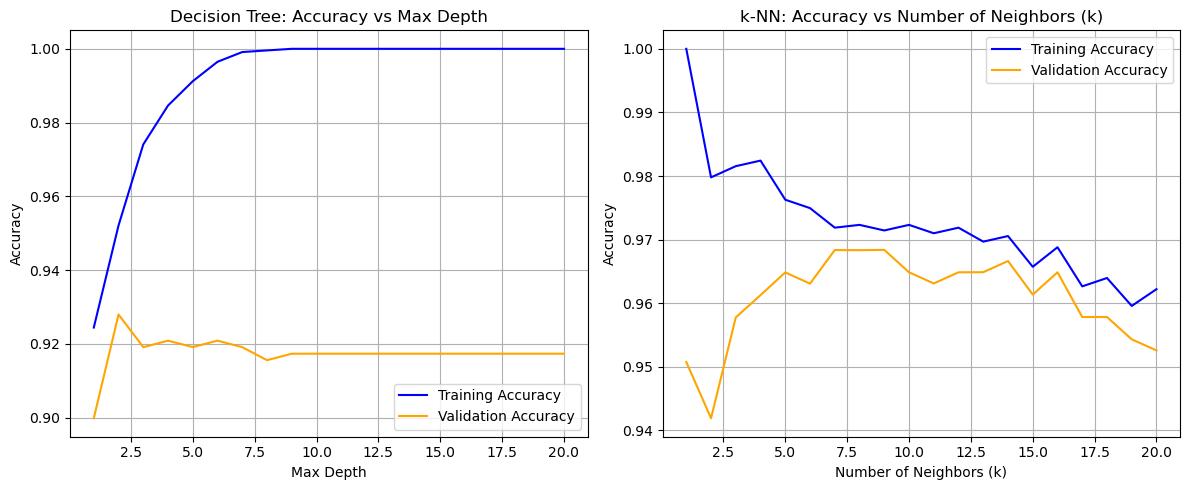

In [8]:
from sklearn.model_selection import validation_curve

# Use original standardized data without PCA for complexity analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define ranges for parameters to test
max_depth_range = np.arange(1, 21)
k_range = np.arange(1, 21)

# Decision Tree validation curve
train_scores_dt, test_scores_dt = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_scaled, y,
    param_name="max_depth",
    param_range=max_depth_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# k-NN validation curve
train_scores_knn, test_scores_knn = validation_curve(
    KNeighborsClassifier(),
    X_scaled, y,
    param_name="n_neighbors",
    param_range=k_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Calculate mean and std of scores
train_mean_dt = np.mean(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)

train_mean_knn = np.mean(train_scores_knn, axis=1)
test_mean_knn = np.mean(test_scores_knn, axis=1)

# Plot Decision Tree validation curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, train_mean_dt, label="Training Accuracy", color="blue")
plt.plot(max_depth_range, test_mean_dt, label="Validation Accuracy", color="orange")
plt.title("Decision Tree: Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot k-NN validation curve
plt.subplot(1, 2, 2)
plt.plot(k_range, train_mean_knn, label="Training Accuracy", color="blue")
plt.plot(k_range, test_mean_knn, label="Validation Accuracy", color="orange")
plt.title("k-NN: Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **3. Strengths and Weaknesses of Each Algorithm**

The strengths and weaknesses of each algorithm are summariezed in the table below:

| **Model**         | **Strengths**                                                                                                                                           | **Weaknesses**                                                                                                 |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Decision Tree** | - Highly interpretable and visually understandable<br>- Fast inference<br>- Handles non-linear decision boundaries                                      | - Prone to overfitting, especially with deep trees<br>- Sensitive to small variations in the data              |
| **Naive Bayes**   | - Extremely fast and scalable<br>- Performs well with high-dimensional data<br>- Simple and robust with small datasets                                  | - Assumes feature independence, which rarely holds in real-world data<br>- Can miss feature interactions       |
| **kNN**           | - High accuracy and flexible to data structure<br>- Non-parametric (no assumptions on data distribution)<br>- Effective with well-scaled and clean data | - Slow prediction time due to distance calculations<br>- Sensitive to irrelevant features and requires scaling |


### **4. Insights**

The k-Nearest Neighbors (kNN) classifier emerged as the best-performing model in this study, demonstrating the highest accuracy and F1-score across both the PCA-transformed and original standardized datasets. This consistent performance highlights the model’s effectiveness in capturing patterns within the breast cancer dataset, regardless of whether dimensionality reduction was applied.

Although Principal Component Analysis (PCA) was employed with the intention of reducing feature dimensionality, it did not result in significant performance improvements across the evaluated classifiers. Nevertheless, PCA can still be valuable in practical scenarios where reducing computational cost or mitigating the curse of dimensionality is important, particularly when working with large-scale or high-dimensional data.

The effect of PCA is also notably algorithm-dependent. For instance, while kNN benefits from PCA in terms of computational efficiency, since distance calculations are faster in lower-dimensional spaces, Naive Bayes may suffer a performance decline. This is likely due to PCA distorting the statistical assumptions Naive Bayes relies on, such as feature independence and the preservation of feature distributions. Therefore, the decision to use PCA should consider the nature of the algorithm and the specific goals of the modeling task.

## **Conclusions**

This report presents a comparative analysis of machine learning algorithms applied to the Breast Cancer Wisconsin dataset, focusing on Decision Tree, Naive Bayes, and k-Nearest Neighbors classifiers. Across both the original and PCA-transformed datasets, the models achieved strong performance, with kNN emerging as the most accurate and robust across all metrics. Feature importance analysis and model complexity evaluation provided further insights into the behavior and interpretability of each model.

The use of PCA, while not significantly improving predictive accuracy, demonstrated potential benefits in reducing dimensionality and computational cost, particularly for algorithms like kNN. The strengths and limitations of each algorithm were examined to assess their suitability for medical classification tasks.

While the dataset’s quality and balance likely contributed to the high accuracy observed, future work could explore model performance on noisier, imbalanced, or higher-dimensional datasets. Additional experiments involving automated component selection, ensemble methods, or real-world clinical data would further strengthen the conclusions drawn from this study.

## **References**

1. load_breast_cancer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
2. GeeksforGeeks. (2025b, June 2). Machine Learning tutorial. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/
3. GeeksforGeeks. (2024, September 4). Top 6 Machine Learning Classification Algorithms. GeeksforGeeks. https://www.geeksforgeeks.org/top-6-machine-learning-algorithms-for-classification/
4. GeeksforGeeks. (2025a, April 5). Evaluation metrics in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/metrics-for-machine-learning-model/
5. TutorialsPoint. (2025, March 25). Principal component analysis in machine learning. https://www.tutorialspoint.com/machine_learning/machine_learning_principal_component_analysis.htm
6. Beyond, D. S. &. (2023, August 20). Model complexity in Machine Learning - Data Science & Beyond - Medium. Medium. https://ishanjainoffical.medium.com/model-complexity-explained-intuitively-e179e38866b6